In [2]:
import numpy as np
from scipy.stats import chi2
from scipy.stats import chisquare
from scipy.stats import chi2_contingency
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd

/Users/rickie/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


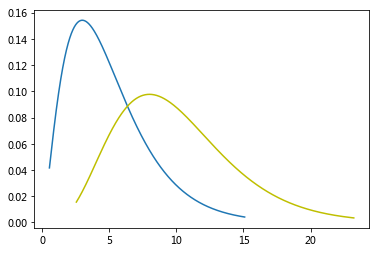

In [3]:
df=[5,10]
x1=np.linspace(chi2.ppf(0.01,df[0]),chi2.ppf(0.99,df[0]),1000)
x2=np.linspace(chi2.ppf(0.01,df[1]),chi2.ppf(0.99,df[1]),1000)
plt.plot(x1,chi2.pdf(x1,df[0]))
plt.plot(x2,chi2.pdf(x2,df[1]),'y-')

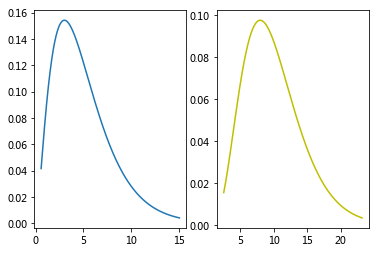

In [4]:
fig=plt.figure()#建立画布
ax=fig.add_subplot(1,2,1)#选取1行2列的第一个位置
ax.plot(x1,chi2.pdf(x1,df[0]))
ax=fig.add_subplot(1,2,2)#选取1行2列的第二个位置
ax.plot(x2,chi2.pdf(x2,df[1]),'y-')

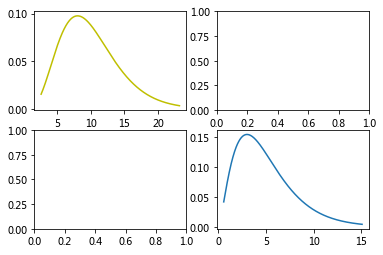

In [5]:
fig,ax=plt.subplots(2,2)
ax[1,1].plot(x1,chi2.pdf(x1,df[0]))
ax[0,0].plot(x2,chi2.pdf(x2,df[1]),'y-')

In [6]:
data=pd.read_csv('/Users/rickie/Desktop/statistics_by_python/titanic.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null object
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null object
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.3+ KB


In [7]:
c_data=data[['pclass','survived','sex']].groupby(['sex','survived']).count()
c_data

pclass
sex    survived        
female 0             81
       1            233
male   0            468
       1            109

In [8]:
chisquare(c_data)

Power_divergenceResult(statistic=array([418.78675645]), pvalue=array([1.88617143e-90]))

In [9]:
c_data_un=data[['pclass','survived','sex']].groupby(['sex','survived']).count().unstack()
c_data_un

pclass     
survived      0    1
sex                 
female       81  233
male        468  109

In [14]:
g, p, dof, expctd =chi2_contingency(c_data_un)
p

1.1973570627755645e-58

80.0

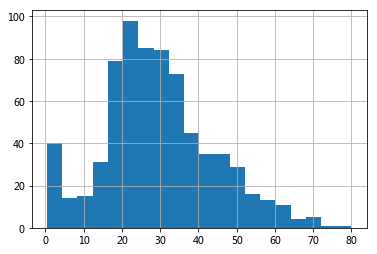

In [20]:
data.age.hist(bins=20)
data.age.max()

In [39]:
bins=np.arange(0,90,10)
data['age_bin']=pd.cut(data.age,bins=bins)
data['age_bin'].value_counts()

(20, 30]    230
(30, 40]    155
(10, 20]    115
(40, 50]     86
(0, 10]      64
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: age_bin, dtype: int64

In [37]:
age_bin=data[['age_bin','sex','survived']].groupby(['age_bin','survived']).count()
chisquare(age_bin)

Power_divergenceResult(statistic=array([510.42577031]), pvalue=array([3.51840142e-99]))

In [41]:
age_bin=data[['age_bin','sex','survived']].groupby(['age_bin','survived']).count().unstack()
chi2_contingency(age_bin)
#chi2.ppf(0.05,7)# critical_value

(15.296687749545693,
 0.03237887956708356,
 7,
 array([[ 38.00560224,  25.99439776],
        [ 68.29131653,  46.70868347],
        [136.58263305,  93.41736695],
        [ 92.04481793,  62.95518207],
        [ 51.07002801,  34.92997199],
        [ 24.94117647,  17.05882353],
        [ 10.0952381 ,   6.9047619 ],
        [  2.96918768,   2.03081232]]))